<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/master/hw3_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Prices: Advanced Regression Techniques


[kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

**Goal**

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 


[linear_model](https://scikit-learn.org/stable/modules/linear_model.html)

เราจะจำเป็นต้องใช้ [seaborn](https://seaborn.pydata.org/) เพื่อช่วยในการ visualization

In [0]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,mean_squared_error
from google.colab import files
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display
import json
import seaborn as sns

from scipy import stats

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!unzip '/content/gdrive/My Drive/house-prices-advanced-regression-techniques.zip'
!ls

Archive:  /content/gdrive/My Drive/house-prices-advanced-regression-techniques.zip
  inflating: sample_submission.csv   
  inflating: data_description.txt    
  inflating: test.csv                
  inflating: train.csv               
adc.json		  gdrive		 test.csv
Chosen_Data_clearToN.csv  sample_data		 train.csv
data_description.txt	  sample_submission.csv


ข้อมูลที่อยู่ใน house-prices-advanced-regression-techniques.zip 

1.   data_description.txt :
2.   train.csv : 
3.   test.csv  : 





เพื่อความรวดเร็ว จำจำเป็นต้องแยกข้อมูล ออกเป็น train set, val set บน train set โดยใช้ [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) เพื่อแบ่งข้อมูล

โดยเราจะแบ่งเป็นอัตราส่วน val : train = 1 : 10 โดยเลือก random_state ที่ 30

ควรใช้ **pd.shape** เพื่อตรวจสอบข้อมูลด้วย

In [0]:
train_data = pd.read_csv('train.csv')
train_data, val_data = train_test_split(train_data, test_size=1/11, random_state=30)
test_data = pd.read_csv('test.csv')

display(train_data.shape)
display(val_data.shape)
display(test_data.shape)

(1327, 81)

(133, 81)

(1459, 80)

## clean data

1.   LotFrontage
2.   GarageYrBlt
3.  MasVnrArea

In [0]:
display(train_data.head())
display(val_data.head())
display(test_data.head())

#train_data.drop(columns =['Alley','MiscFeature'])

train_data["LotFrontage"] = train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode().iloc[0])
train_data["GarageYrBlt"] = train_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].mode().iloc[0])
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].mode().iloc[0])

val_data["LotFrontage"] = val_data["LotFrontage"].fillna(train_data["LotFrontage"].mode().iloc[0])
val_data["GarageYrBlt"] = val_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].mode().iloc[0])
val_data["MasVnrArea"] = val_data["MasVnrArea"].fillna(train_data["MasVnrArea"].mode().iloc[0])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
499,500,20,RL,70.0,7535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnWw,Shed,480,6,2007,WD,Normal,120000
325,326,45,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,87000
939,940,70,RL,NaN,24090,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,COD,Normal,244400
789,790,60,RL,NaN,12205,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,187500
236,237,20,RL,65.0,8773,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,185500


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,4,2007,COD,Normal,157900
728,729,90,RL,85.0,11475,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,COD,Abnorml,110000
1354,1355,60,RL,NaN,10316,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,235000
512,513,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## function เพื่อดู ชนิดของตัวแปร

In [0]:
def get_feature_groups(ames_df):
    # Numerical Features
    num_features = ames_df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = ames_df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

## feature visualization

เพื่อการกระจายของทุกตัวแปร และตัวแปรมีจำนวนมาก เราจึงเลือกใช้  [sns.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) เพื่อช่วยในการในการดู histogram
แต่เราจำเป็น ต้องส่งข้อมูลในรูปแบบ [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) ในการช่วย plot

สามารถดูตัวอย่างได้ตามนี้ [example](https://seaborn.pydata.org/tutorial/axis_grids.html)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


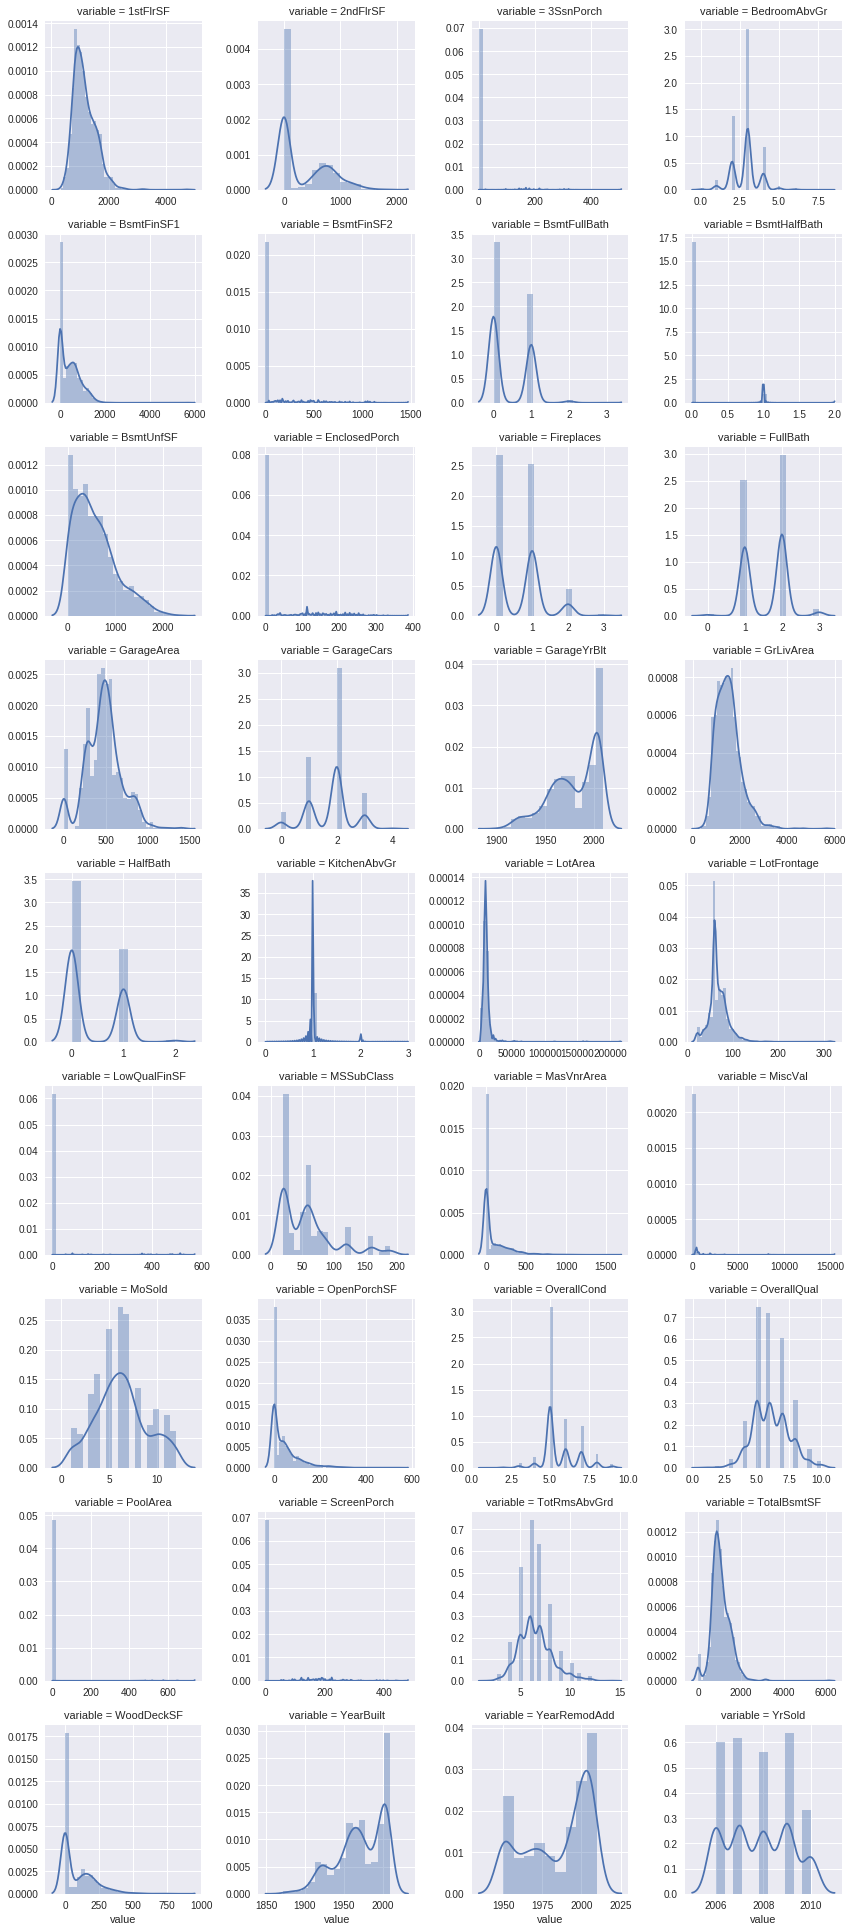

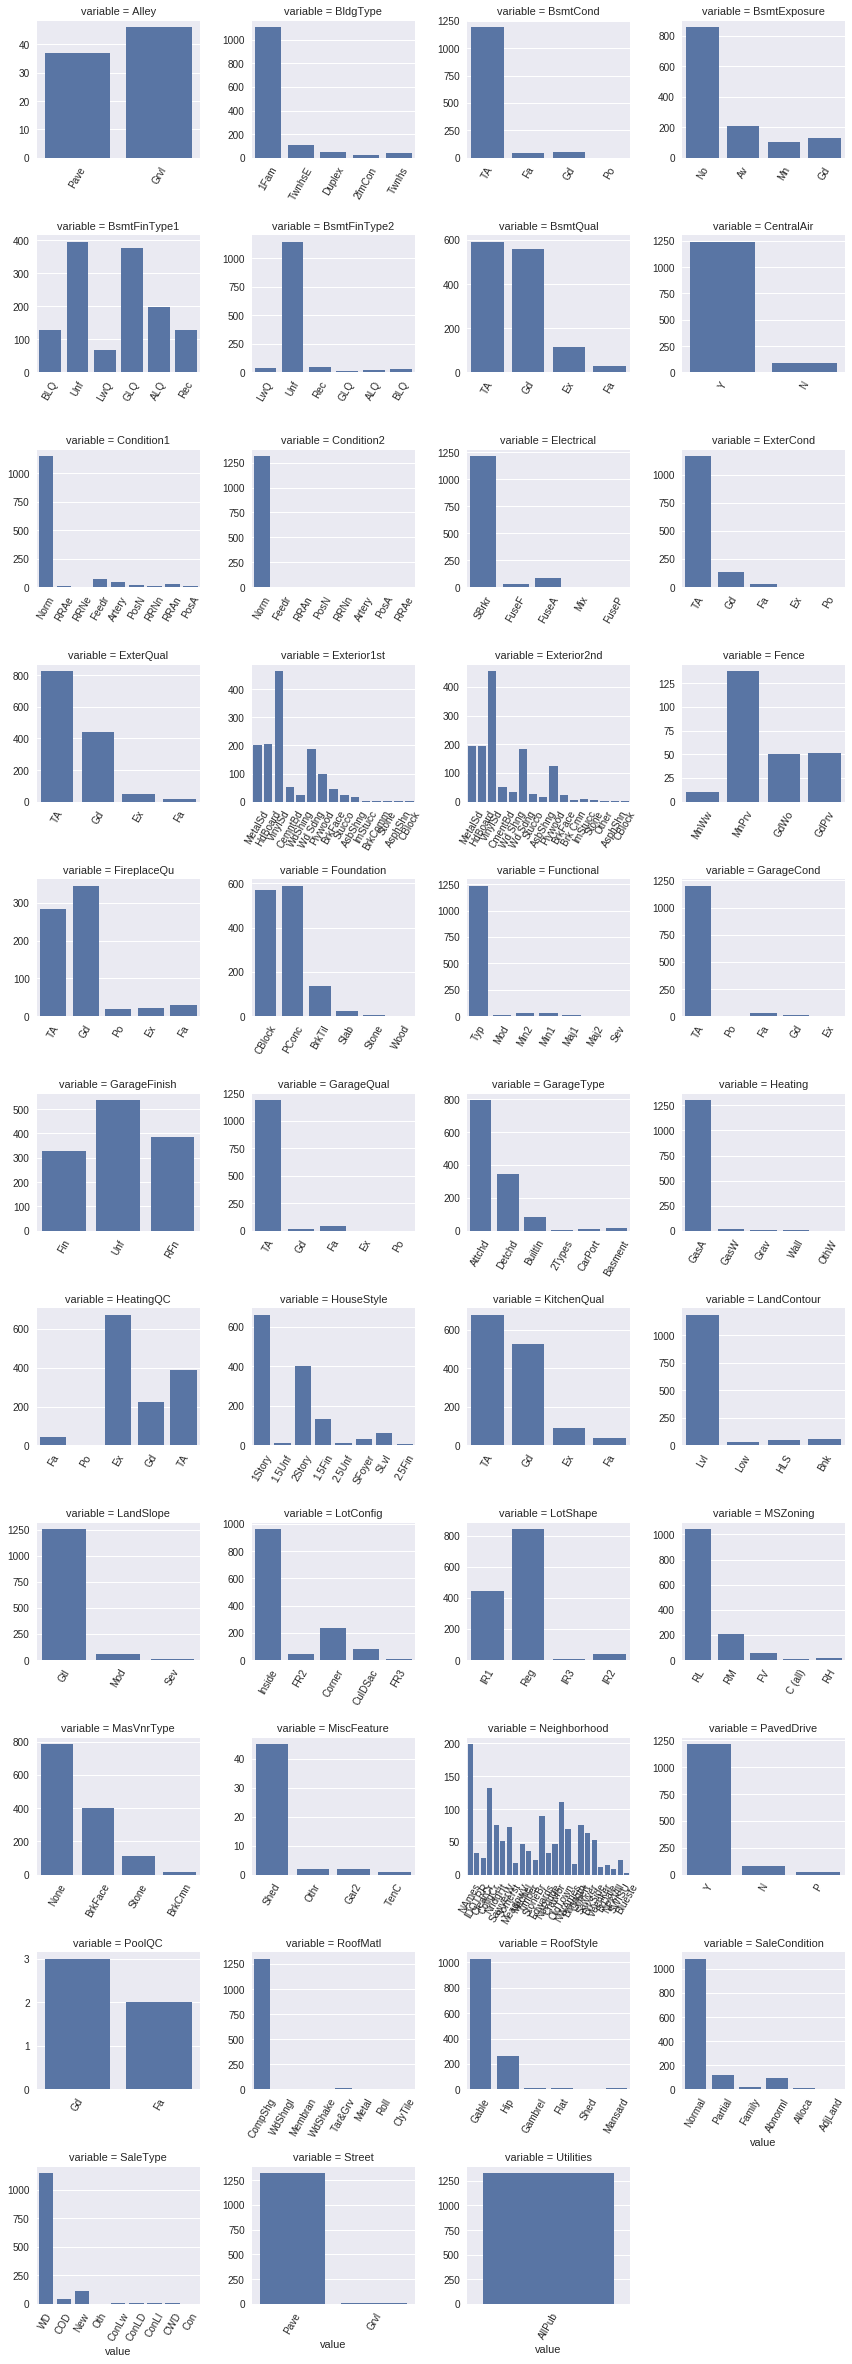

In [0]:
num_features, cat_features = get_feature_groups(train_data)

# Grid of distribution plots of all numerical features
f = pd.melt(train_data, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

# Grid of frequency plots of all categoriccal features
f = pd.melt(train_data, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

วาด hsitogram เพื่อตรวจสอบว่า ราคาบ้าน ว่าการกระจายเป็นอย่างไร

หรือ เราสามารถ ดู ว่า ข้อมูลมีลักษณะที่ คล้าย gussain distribution ขนาดไหน ผ่าน [QQ-plot](https://www.youtube.com/watch?v=X9_ISJ0YpGw) ที่เราสามารถ หาได้จาก [stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html)



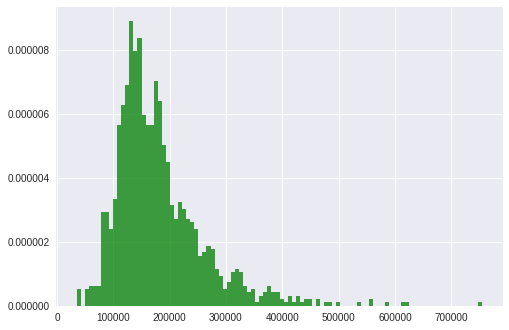

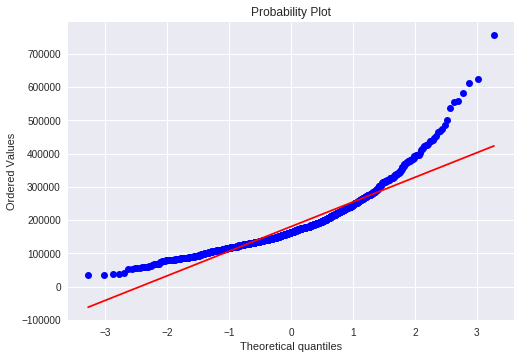

In [0]:
price_train = np.array(train_data['SalePrice'].values)
n, bins, patches = plt.hist(price_train, 100, density=True, facecolor='g', alpha=0.75)
plt.show()


fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

จากข้อมูลที่ เห็นจะเห็นว่า ลักษณะ ของ QQ-plot นั้น จะเห็นว่ากราฟขึ้นออกเป็น exponential ดังนั้น จำเป็นต้องใช้ logarithm มาช่วย

แต่ว่าการใช้ $y=log(x)$ มีโอกาสเป็น $-\infty$ ถ้า x = 0 ดังนั้น เราจึงเลือกใช้  $y=log(1+x)$ (ตัวอย่างการใช้ [np.log1p](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html) )

( invert function ของ y = log(1+x) [np.expm1](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expm1.html#numpy.expm1) )



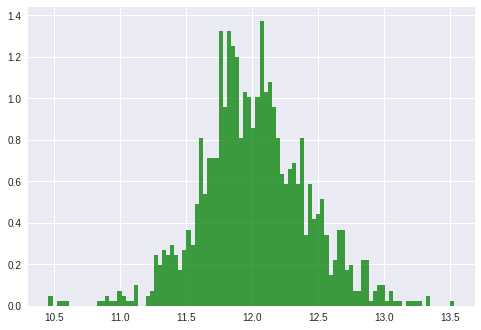

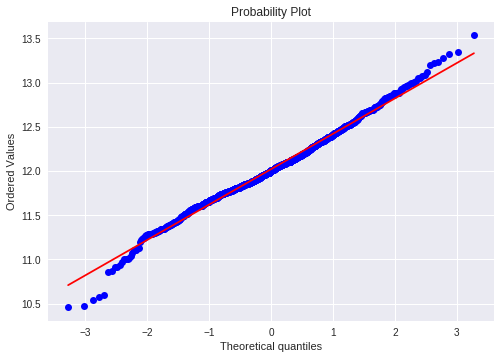

((array([-3.27828194, -3.01912039, -2.87487754, ...,  2.87487754,
        3.01912039,  3.27828194]), array([10.46027076, 10.47197813, 10.54273278, ..., 13.32392858,
       13.34550853, 13.53447435])), (0.40006615387905664, 12.02128342139497, 0.9956644519475855))


In [0]:
price_train = np.log1p(np.array(train_data['SalePrice'].values))
n, bins, patches = plt.hist(price_train, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

fig = plt.figure()
res = stats.probplot(np.log1p(train_data['SalePrice']), plot=plt)
plt.show()

##สร้าง normalizer เพื่อใช้ก่อนแปลงค่าเข้า Linear Regression

In [0]:
def normalizer(data,is_one_dim = False):
  if (is_one_dim):
    min_max_scale = preprocessing.MinMaxScaler().fit(data.reshape((len(data),1)))
  else:
    min_max_scale = preprocessing.MinMaxScaler().fit(data)
  return min_max_scale

## functional สำหรับวัดผล Linear Regression




In [0]:
def evaluate_lin_reg(predict_data_train_norm,predict_data_val_norm,real_price_train,real_price_val,p_normalizer):
  
  train_predict_log1p = p_normalizer.inverse_transform(predict_data_train_norm.reshape((len(predict_data_train_norm),1))).reshape(len(predict_data_train_norm))
  train_predict = np.expm1(train_predict_log1p)
  
  val_predict_log1p = p_normalizer.inverse_transform(predict_data_val_norm.reshape((len(predict_data_val_norm),1))).reshape(len(predict_data_val_norm))
  val_predict = np.expm1(val_predict_log1p)
  
  rmse_train = np.sqrt(mean_squared_error(train_predict,real_price_train))
  mean_per_train = np.mean(np.absolute(train_predict - real_price_train)/real_price_train)*100
  
  rmse_val = np.sqrt(mean_squared_error(val_predict,real_price_val))
  mean_per_val = np.mean(np.absolute(val_predict - real_price_val)/real_price_val)*100
  
  
  print('rmse train set : ', rmse_train)
  print('mean percent train set : ', mean_per_train)
  print('rmse val set : ', rmse_val)
  print('mean percent val set : ', mean_per_val)
  
  return rmse_train,mean_per_train,rmse_val,mean_per_val

## check  nan 

In [0]:
train_np = np.array(train_data[num_features].values)
print(np.where(np.isnan(train_np)))

(array([], dtype=int64), array([], dtype=int64))


## [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

เราจะใช้ Linear Regression ในการทำนายราคาบ้าน

ใน Linear Regression เรา สามารถดูความเหมาะสมได้จาก ค่า [$R^2 score$](https://www.youtube.com/watch?v=lng4ZgConCM) ได้ประมาณนึง

In [0]:
train_np = np.array(train_data[num_features].values)
train_price_data = np.array(train_data['SalePrice'].values)
train_log1p_price = np.log1p(train_price_data)
train_normalizer = normalizer(train_np)
train_np_norm = train_normalizer.transform(train_np)
price_normalizer = normalizer(train_log1p_price,is_one_dim = True)
train_log1p_price_norm = price_normalizer.transform(train_log1p_price.reshape(1,len(train_log1p_price))).reshape(len(train_log1p_price))

lin_reg = LinearRegression().fit(train_np_norm, train_log1p_price_norm)
train_predict_log1p_norm = lin_reg.predict(train_np_norm)

val_np = np.array(val_data[num_features].values)
val_price_data = np.array(val_data['SalePrice'].values)
val_log1p_price = np.log1p(val_price_data)
val_np_norm = train_normalizer.transform(val_np)
val_log1p_price_norm = price_normalizer.transform(val_log1p_price.reshape(1,len(val_log1p_price))).reshape(len(val_log1p_price))

print('r^2 score train set :',lin_reg.score(train_np_norm, train_log1p_price_norm))
print('r^2 score val set :',lin_reg.score(val_np_norm, val_log1p_price_norm))

val_predict_log1p_norm = lin_reg.predict(val_np_norm)

rms_train,mp_train,rms_val,mp_val = evaluate_lin_reg(train_predict_log1p_norm,val_predict_log1p_norm,train_price_data,val_price_data,price_normalizer)

r^2 score train set : 0.8658808620825247
r^2 score val set : 0.8879482539104507
rmse train set :  36269.36119583215
mean percent train set :  10.372480488973961
rmse val set :  32679.297454884912
mean percent val set :  9.059003245188292


การทำนายราคาบ้านนั้น เราควรจะ เปลี่ยนเทียบความผิดพลาด กับ ค่า standard deviation ( สามารถใช้ [np.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) ช่วยได้)

In [0]:
print(np.std(val_price_data))

85097.07743870174


## select useful  feature


เลือก feature โดยใช้ correlation matrix

แต่เนื่องจาก ตัวแปรมีจำนวนมาก เราจึงเลือกใช้ [link sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) ในการแสดงผล

(1460, 37)


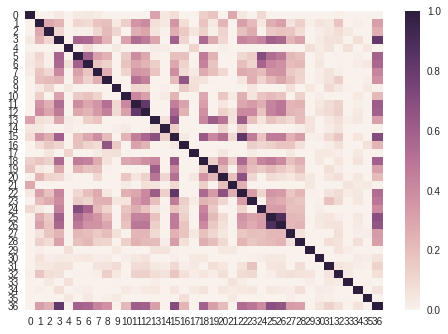

In [0]:
data_to_sel_feature = np.vstack((train_np,val_np))
log1p_price_all = np.hstack((train_log1p_price,val_log1p_price))

data_train = np.hstack((data_to_sel_feature,log1p_price_all.reshape((len(log1p_price_all),1))))
print(data_train.shape)

corre_mat = np.corrcoef(data_train.T)
ax = sns.heatmap(corre_mat, vmin=0, vmax=1)

แสดงผลว่า ตัวไหนมี ค่า correlation ตามลำดับ

In [0]:
corre_mat_abs = np.absolute(corre_mat[36,:36])
ind_feature_imp = np.flip(np.argsort(corre_mat_abs) ,axis = 0)

print(num_features_np[ind_feature_imp])

['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'TotRmsAbvGrd'
 'Fireplaces' 'MasVnrArea' 'GarageYrBlt' 'BsmtFinSF1' 'WoodDeckSF'
 'LotFrontage' 'OpenPorchSF' '2ndFlrSF' 'HalfBath' 'LotArea'
 'BsmtFullBath' 'BsmtUnfSF' 'BedroomAbvGr' 'EnclosedPorch' 'KitchenAbvGr'
 'ScreenPorch' 'MSSubClass' 'PoolArea' 'MoSold' '3SsnPorch' 'LowQualFinSF'
 'YrSold' 'OverallCond' 'MiscVal' 'BsmtHalfBath' 'BsmtFinSF2']


## เลือก feature โดยใช้ weight ของ feature ที่สร้างขึ้น จาก linear regression ด้านบน 

แสดงผลในรูปแบบของ [bar chart](https://pythonspot.com/matplotlib-bar-chart/)




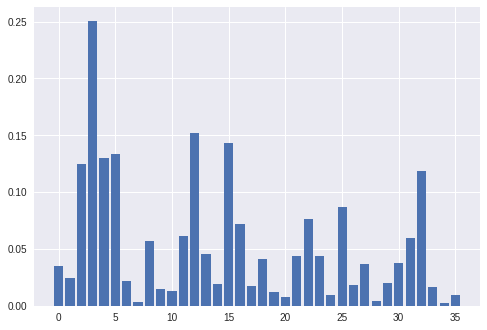

In [0]:
coeff_np = np.array(lin_reg.coef_)
ind = np.arange(coeff_np.shape[0])
ind_sort_w_max = np.flip(np.argsort(coeff_np) ,axis = 0)

plt.bar(ind, np.absolute(coeff_np), align='center', alpha=1)
plt.show()

## แสดงผลว่า ตัวไหนมี ค่า weight สูงสุด ตามลำดับ

In [0]:
num_features_np = np.array(num_features)
print(num_features_np[ind_sort_w_max])

['OverallQual' '1stFlrSF' 'GrLivArea' 'YearBuilt' 'OverallCond' 'LotArea'
 'GarageCars' 'TotRmsAbvGrd' 'BsmtFullBath' 'TotalBsmtSF' 'ScreenPorch'
 'BsmtFinSF1' '2ndFlrSF' 'Fireplaces' 'FullBath' '3SsnPorch' 'WoodDeckSF'
 'YearRemodAdd' 'EnclosedPorch' 'LowQualFinSF' 'GarageArea' 'BsmtHalfBath'
 'BsmtFinSF2' 'BsmtUnfSF' 'HalfBath' 'MasVnrArea' 'MoSold' 'OpenPorchSF'
 'BedroomAbvGr' 'YrSold' 'GarageYrBlt' 'MiscVal' 'LotFrontage'
 'MSSubClass' 'KitchenAbvGr' 'PoolArea']


## เลือก  top 12 ของ ของค่า weight

In [0]:
num_feature_sel = 12
feature_sel = num_features_np[ind_sort_w_max[:num_feature_sel]]
#feature_sel = num_features_np[ind_feature_imp[:num_feature_sel]]

train_cut_np = np.array(train_data[feature_sel].values)
train_cut_normalizer = normalizer(train_cut_np)
train_cut_norm = train_cut_normalizer.transform(train_cut_np)

lin_reg_cut = LinearRegression().fit(train_cut_norm, train_log1p_price_norm)
train_cut_predict_log1p_norm = lin_reg_cut.predict(train_cut_norm)

val_cut_np = np.array(val_data[feature_sel].values)
val_cut_norm = train_cut_normalizer.transform(val_cut_np)
val_cut_predict_log1p_norm = lin_reg_cut.predict(val_cut_norm)


print('r^2 score train set :',lin_reg_cut.score(train_cut_norm, train_log1p_price_norm))
print('r^2 score val set :',lin_reg_cut.score(val_cut_norm, val_log1p_price_norm))

rms_train,mp_train,rms_val,mp_val = evaluate_lin_reg(train_cut_predict_log1p_norm,val_cut_predict_log1p_norm,train_price_data,val_price_data,price_normalizer)


r^2 score train set : 0.8495466436420288
r^2 score val set : 0.8795042049685069
rmse train set :  45685.087060323174
mean percent train set :  11.169014238695208
rmse val set :  25987.837482220737
mean percent val set :  9.881766970614496


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## created complex feature

[polynomial feature](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

ลองใช้ 2-order กับ feature ที่ คัดมา

In [0]:
train_poly_np = preprocessing.PolynomialFeatures(2).fit_transform(train_cut_np)
train_poly_normalizer = normalizer(train_poly_np)
train_poly_norm = train_poly_normalizer.transform(train_poly_np)

lin_reg_poly = LinearRegression().fit(train_poly_norm, train_log1p_price_norm)
train_poly_predict_log1p_norm = lin_reg_poly.predict(train_poly_norm)

val_poly_np = preprocessing.PolynomialFeatures(2).fit_transform(val_cut_np)
val_poly_norm = train_poly_normalizer.transform(val_poly_np)
val_poly_predict_log1p_norm = lin_reg_poly.predict(val_poly_norm)

print('r^2 score train set :',lin_reg_poly.score(train_poly_norm, train_log1p_price_norm))
print('r^2 score val set :',lin_reg_poly.score(val_poly_norm, val_log1p_price_norm))

rms_train,mp_train,rms_val,mp_val = evaluate_lin_reg(train_poly_predict_log1p_norm,val_poly_predict_log1p_norm,train_price_data,val_price_data,price_normalizer)

r^2 score train set : 0.9033953532910013
r^2 score val set : 0.9045080937749838
rmse train set :  24257.647138808985
mean percent train set :  8.83665457504248
rmse val set :  27160.769507030007
mean percent val set :  8.642386361284135


ถ้าเลือก ทุก numberical feature เป็นไปได้ โดยใช้ 3-order

( ใช้ $R^2 score$ ในการวัดผล)

# OVER-FITTING

In [0]:
train_poly_np = preprocessing.PolynomialFeatures(3).fit_transform(train_np)
train_poly_normalizer = normalizer(train_poly_np)
train_poly_norm = train_poly_normalizer.transform(train_poly_np)

lin_reg_poly = LinearRegression().fit(train_poly_norm, train_log1p_price_norm)
train_poly_predict_log1p_norm = lin_reg_poly.predict(train_poly_norm)

val_poly_np = preprocessing.PolynomialFeatures(3).fit_transform(val_np)
val_poly_norm = train_poly_normalizer.transform(val_poly_np)
val_poly_predict_log1p_norm = lin_reg_poly.predict(val_poly_norm)

print('r^2 score train set :',lin_reg_poly.score(train_poly_norm, train_log1p_price_norm))
print('r^2 score val set :',lin_reg_poly.score(val_poly_norm, val_log1p_price_norm))

#rms_train,mp_train,rms_val,mp_val = evaluate_lin_reg(train_poly_predict_log1p_norm,val_poly_predict_log1p_norm,train_price_data,val_price_data,price_normalizer)

r^2 score train set : 0.9570783820290534
r^2 score val set : -8.441949244848109e+21


ลองตรวจสอบ จาก ว่าค่าไหน เป็น $\infty$  หรือ น้อยกว่า 0 บ้าง

In [0]:
val_predict_log1p = price_normalizer.inverse_transform(val_poly_predict_log1p_norm.reshape((len(val_poly_predict_log1p_norm),1))).reshape(len(val_poly_predict_log1p_norm))
val_predict = np.expm1(val_predict_log1p)
print(np.sum(val_predict < 0))
print(np.sum(np.isinf(val_predict)))

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in expm1
  


# Lasso

การเลือก feature โดยใช้ lasso 



แสดง weight ของ 3-order ถ้าเลือก ทุก feature

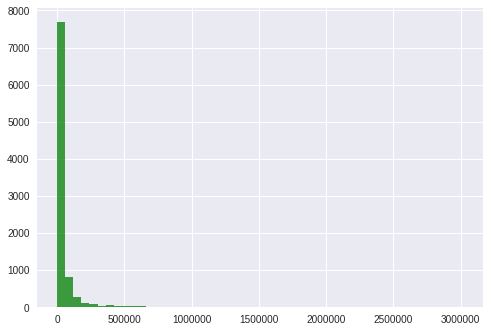

In [0]:
train_poly_np = preprocessing.PolynomialFeatures(3).fit_transform(train_np)
train_poly_normalizer = normalizer(train_poly_np)
train_poly_norm = train_poly_normalizer.transform(train_poly_np)
lin_reg_poly_example = LinearRegression().fit(train_poly_norm, train_log1p_price_norm)

coeff_np = np.array(lin_reg_poly_example.coef_)
ind = np.arange(coeff_np.shape[0])

n, bins, patches = plt.hist(np.absolute(coeff_np), 50, facecolor='g', alpha=0.75)
plt.show()

เราจะใช้ [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) ในการ regularization

โดย  alpha = 0.00005 , l1_ratio = 1

In [0]:
train_poly_np = preprocessing.PolynomialFeatures(3).fit_transform(train_np)
train_poly_normalizer = normalizer(train_poly_np)
train_poly_norm = train_poly_normalizer.transform(train_poly_np)

val_poly_np = preprocessing.PolynomialFeatures(3).fit_transform(val_np)
val_poly_norm = train_poly_normalizer.transform(val_poly_np)

alpha_sel = 0.00005
l1_ratio_sel = 1.0

lin_reg_l1 = ElasticNet(alpha = alpha_sel, l1_ratio = l1_ratio_sel).fit(train_poly_norm, train_log1p_price_norm)
train_predict_l1_log1p_norm = lin_reg_l1.predict(train_poly_norm)

val_predict_l1_log1p_norm = lin_reg_l1.predict(val_poly_norm)

print('r^2 score train set :',lin_reg_l1.score(train_poly_norm, train_log1p_price_norm))
print('r^2 score val set :',lin_reg_l1.score(val_poly_norm, val_log1p_price_norm))

rms_train,mp_train,rms_val,mp_val = evaluate_lin_reg(train_predict_l1_log1p_norm,val_predict_l1_log1p_norm,train_price_data,val_price_data,price_normalizer)

r^2 score train set : 0.9229517426268987
r^2 score val set : 0.9148203578107077
rmse train set :  20090.332617296735
mean percent train set :  7.990267449839415
rmse val set :  24147.311851544786
mean percent val set :  8.234733336310406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## แสดงผล wieght lasso

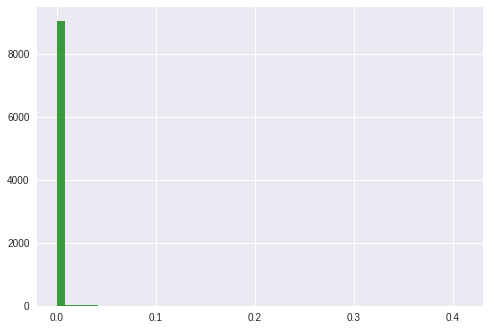

In [0]:
coeff_np = np.array(lin_reg_l1.coef_)
ind = np.arange(coeff_np.shape[0])

n, bins, patches = plt.hist(np.absolute(coeff_np), 50, facecolor='g', alpha=0.75)
plt.show()